In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import os

In [2]:
np.random.seed(0)

n_samples = 20

x_neg_10 = np.random.normal(size=(n_samples))
x_neg_05 = np.random.normal(size=(n_samples))
x_00 = np.random.normal(size=(n_samples))
x_pos_05 = np.random.normal(size=(n_samples))
x_pos_10 = np.random.normal(size=(n_samples))


y_pos_10 = x_pos_10
y_neg_10 = -x_neg_10

corr = 0
while corr < 0.45 or corr > 0.55:
    y_pos_05 = x_pos_05 + np.random.normal(size=(n_samples))
    corr = np.corrcoef(x_pos_05, y_pos_05)[0, 1]

while corr < -0.55 or corr > -0.45:
    y_neg_05 = -x_neg_05 + np.random.normal(size=(n_samples))
    corr = np.corrcoef(x_neg_05, y_neg_05)[0, 1]

while corr < -0.05 or corr > 0.05:
    y_00 = np.random.normal(size=(n_samples))
    corr = np.corrcoef(x_00, y_00)[0, 1]

In [3]:
x = np.concatenate((x_neg_10, x_neg_05, x_00, x_pos_05, x_pos_10))
y = np.concatenate((y_neg_10, y_neg_05, y_00, y_pos_05, y_pos_10))

x += np.random.normal(scale=0.2, size=(100))
y += np.random.normal(scale=0.2, size=(100))

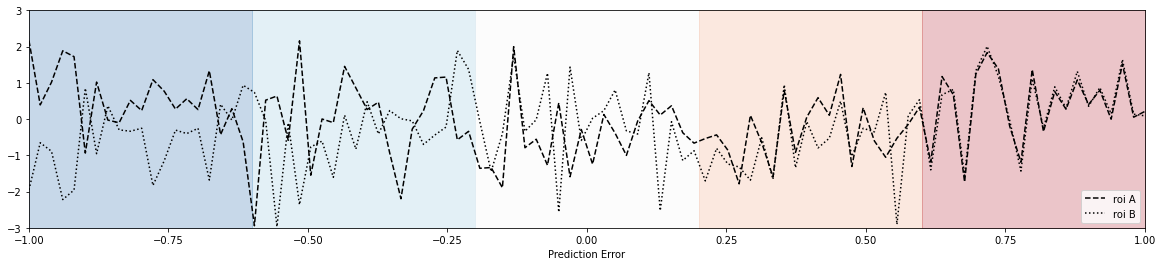

In [4]:
perr = np.linspace(-1, 1, 100)

fig, ax = plt.subplots(figsize=(20, 4))

ax.plot(perr, x, 'k--', label='roi A')
ax.plot(perr, y, 'k:', label='roi B')

ax.legend(loc='lower right')
ax.set_xlim([-1, 1])
ax.set_ylim([-3, 3])
ax.set_xlabel('Prediction Error')

# Draw prediction error boundaries
cmap = matplotlib.cm.get_cmap('RdBu_r')
boundaries = (-1, -0.6, -0.2, 0.2, 0.6, 1)
for x1, x2 in zip(boundaries, boundaries[1:]):
    x_norm = (((x1 + x2) / 2) + 1) / 2
    color = cmap(x_norm)
    color = (*color[:3], 0.25)
    plt.fill_between(
        [x1, x2], 
        [ax.get_ylim()[0], ax.get_ylim()[0]], 
        [ax.get_ylim()[1], ax.get_ylim()[1]], 
        color=color
    )